In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as Image
from skimage import feature
import os
import math
from sklearn.decomposition import PCA 
from skimage.feature import hog

def walk(path):
    table=[]
    if not os.path.exists(path):
        return -1
    for root,dirs,names in os.walk(path):
        for filename in names:
            table.append(os.path.join(root,filename))
    table.sort()
    return table


In [3]:
#lire les images et les labels
path_image="data/image/1"
path_label="data/label/1"
imgpath=walk(path_image)
labelpath=walk(path_label)
img_table=[]
label_table=[]
for i in imgpath:
    img_table.append(cv2.imread(i,cv2.IMREAD_GRAYSCALE))

label={}
a=0
for i in labelpath:
    label[a]={}
    file_object=open(i)
    lines = file_object.readlines()
    label[a]["direction"]=int(lines[0].split()[0])
    label[a]["box"]=lines[2].split()
    a+=1
        

In [4]:
for i in range(len(img_table)):
    img_table[i]=np.sqrt(img_table[i] / np.max(img_table[i]))*255
    img_table[i] = np.asarray(img_table[i], dtype=np.uint8) 
print(img_table[0])

[[249 252 249 ... 176 174 167]
 [250 252 249 ... 181 177 167]
 [250 252 249 ... 185 179 165]
 ...
 [210 218 210 ... 160 162 165]
 [208 217 209 ... 159 161 162]
 [207 217 210 ... 159 159 160]]


In [5]:
img_bound=[]
#garder que les parties du bounding box
for i in range(len(img_table)):
    x1,y1,x2,y2=label[i]["box"]
    #print(x1,y1,x2,y2)
    img_bound.append(img_table[i][int(x1):int(x2),int(y1):int(y2)])

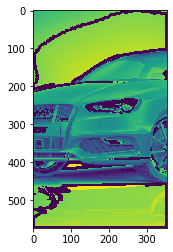

In [8]:
img.
img = img_bound[1]
ret, thresh = cv2.threshold(img, 200, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img, contours, -1, (0,255,0), 2)
plt.imshow(img)

In [ ]:
def grab_cut(img):
    # 读取图片
    # 图片宽度
    img_x = img.shape[1]
    # 图片高度
    img_y = img.shape[0]
    # 分割的矩形区域
    rect = (96,1,img_x, img_y)
    # 背景模式,必须为1行,13x5列
    bgModel = np.zeros((1, 65), np.float64)
    # 前景模式,必须为1行,13x5列
    fgModel = np.zeros((1, 65), np.float64)
    # 图像掩模,取值有0,1,2,3
    mask = np.zeros(img.shape[:2], np.uint8)
    # grabCut处理,GC_INIT_WITH_RECT模式
    #cv2.grabCut(img, mask, rect, bgModel, fgModel, 4, cv2.GC_INIT_WITH_RECT)
    # grabCut处理,GC_INIT_WITH_MASK模式
    cv2.grabCut(img, mask, rect, bgModel, fgModel, 4, cv2.GC_INIT_WITH_MASK)
    # 将背景0,2设成0,其余设成1
    mask2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')
    # 重新计算图像着色,对应元素相乘
    img = img*mask2[:, :, np.newaxis]
    plt.imshow(img)
    plt.show()

img=img_table[0]
grab_cut(img)